# Vizualization project

The theme discussed is violence against women and girls (VAWG), recognized by the UN as a widespread and severe human rights violation. This form of violence includes physical, sexual, and psychological abuse, such as intimate partner violence, sexual harassment, human trafficking, female genital mutilation, and child marriage. Despite being a universal issue, certain groups, like young girls, older women, LGBTQ+ individuals, migrants, and those in humanitarian crises, are particularly vulnerable. The Declaration on the Elimination of Violence Against Women defines it as any gender-based violence causing harm or suffering to women. The Sustainable Development Goals (SDGs) cannot be achieved without addressing this issue.

The data, sourced from the Demographic and Health Surveys Program, focuses on attitudes and justifications for violence against women in African, Asian, and South American countries. The findings suggest that access to education plays a crucial role in shaping awareness and attitudes, highlighting the importance of prioritizing public awareness campaigns and education for women and girls to convey that violence is never acceptable or justifiable.

Columns: <br>
Record ID: Unique numeric identifier for each question by country. <br>
Country: The country where the survey was conducted.<br>
Gender: Specifies whether respondents were male or female.<br>
Demographics: Different demographic groupings for segmentation, including marital status, education level, employment status, residence type, or age.<br>
Question: Statements respondents were asked to agree or disagree with, relating to justifications for a husband hitting or beating his wife in various situations.<br>
Response: Demographic segment into which the respondent falls (e.g., age groups like 15-24, 25-34).<br>
Survey Year: The year in which the Demographic and Health Survey (DHS) took place, providing nationally-representative household data on population, health, and nutrition indicators.<br>
Value: The percentage of people surveyed in the relevant group who agree with the specified question, expressed as a percentage (e.g., the percentage of women aged 15-24 in Afghanistan who agree that a husband is justified in hitting his wife if she burns the food).

In [1]:
import pandas as pd
import numpy as np
import sys, os

In [2]:
import plotly.express as px
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#e5e5e5'

In [4]:
print("Python version:", sys.version)
print("Seaborn version:", sns.__version__)

Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Seaborn version: 0.12.2


## Read file

In [5]:
violence_data = pd.read_csv('violence_data.csv')

In [6]:
violence_data

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,Alpha-3 code
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN,AFG
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1,AFG
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7,AFG
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8,AFG
4,1,Afghanistan,F,Marital status,Widowed or divorced or separated,... if she burns the food,01/01/2015,13.8,AFG
...,...,...,...,...,...,...,...,...,...
12595,210,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,01/01/2015,11.8,ZWE
12596,280,Zimbabwe,M,Residence,Rural,... if she neglects the children,01/01/2015,20.1,ZWE
12597,280,Zimbabwe,M,Residence,Urban,... if she neglects the children,01/01/2015,15.0,ZWE
12598,350,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,01/01/2015,7.2,ZWE


In [7]:
violence_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
 8   Alpha-3 code           12600 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 886.1+ KB


In [8]:
drop = violence_data.dropna()

In [9]:
drop['Survey Year'] = pd.to_datetime(drop['Survey Year'], format='%d/%m/%Y').dt.year

C:\Users\Teodora\AppData\Local\Temp\ipykernel_19792\2278021071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop['Survey Year'] = pd.to_datetime(drop['Survey Year'], format='%d/%m/%Y').dt.year


In [10]:
drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11187 entries, 1 to 12599
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               11187 non-null  int64  
 1   Country                11187 non-null  object 
 2   Gender                 11187 non-null  object 
 3   Demographics Question  11187 non-null  object 
 4   Demographics Response  11187 non-null  object 
 5   Question               11187 non-null  object 
 6   Survey Year            11187 non-null  int32  
 7   Value                  11187 non-null  float64
 8   Alpha-3 code           11187 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 830.3+ KB


In [11]:
drop['Demographics Question'].unique()

array(['Education', 'Marital status', 'Employment', 'Age', 'Residence'],
      dtype=object)

In [12]:
drop['Country'].value_counts()

Country
Zimbabwe      180
Nepal         180
Ghana         180
Guatemala     180
Guinea        180
             ... 
Peru           90
Tajikistan     90
Bangladesh     84
Egypt          84
Turkey         78
Name: count, Length: 70, dtype: int64

In [13]:
drop['Survey Year'].unique()

array([2015, 2017, 2006, 2014, 2008, 2010, 2016, 2011, 2012, 2013, 2002,
       2018, 2009, 2005, 2003, 2001, 2000, 2007])

In [14]:
drop['Gender'].value_counts()

Gender
F    6143
M    5044
Name: count, dtype: int64

In [15]:
drop.describe()

,RecordID,Survey Year,Value
count,11187.00000,11187.000000,11187.000000
mean,211.13328,2013.038080,19.762537
std,120.86662,3.619506,16.986437
min,1.00000,2000.000000,0.000000
25%,106.00000,2012.000000,6.200000
50%,212.00000,2014.000000,14.900000
75%,316.00000,2015.000000,29.200000
max,420.00000,2018.000000,86.900000


### Examining outliers

In [16]:
drop['Survey Year'].value_counts()

Survey Year
2015    1776
2013    1776
2014    1428
2016    1374
2017    1023
2012     960
2011     660
2008     444
2018     360
2006     348
2010     180
2009     180
2005     162
2007     156
2002      90
2003      90
2001      90
2000      90
Name: count, dtype: int64

In [17]:
drop.groupby('Survey Year').Gender.value_counts()

Survey Year  Gender
2000         F          90
2001         F          90
2002         F          90
2003         F          90
2005         F          84
             M          78
2006         F         180
             M         168
2007         M          78
             F          78
2008         F         264
             M         180
2009         M          90
             F          90
2010         M          90
             F          90
2011         F         330
             M         330
2012         F         534
             M         426
2013         F         978
             M         798
2014         F         798
             M         630
2015         M         888
             F         888
2016         F         690
             M         684
2017         F         599
             M         424
2018         F         180
             M         180
Name: count, dtype: int64

Here we can see that there is no data for males prior to 2004, and that's why we are excluding these years from the dataframe.

In [19]:
drop = drop[ drop['Survey Year'] >2003]

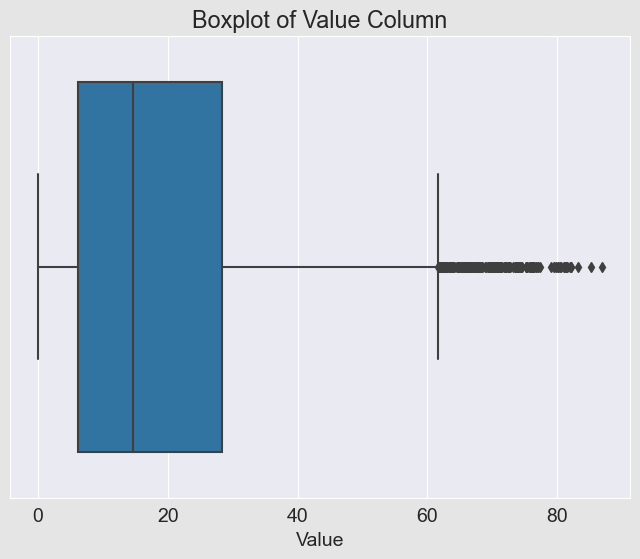

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Extract the 'Value' column
values_column = drop['Value']

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=values_column)

# Display the plot
plt.title('Boxplot of Value Column')
plt.show()

In [21]:
# Calculate the interquartile range (IQR)
Q1 = values_column.quantile(0.25)
Q3 = values_column.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = drop[(values_column < lower_bound) | (values_column > upper_bound)]

In [22]:
outliers

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,Alpha-3 code
30,351,Afghanistan,F,Age,15-24,... for at least one specific reason,2015,80.1,AFG
31,351,Afghanistan,F,Age,25-34,... for at least one specific reason,2015,81.5,AFG
32,351,Afghanistan,F,Age,35-49,... for at least one specific reason,2015,79.0,AFG
36,141,Afghanistan,F,Age,15-24,... if she goes out without telling him,2015,67.7,AFG
37,141,Afghanistan,F,Age,25-34,... if she goes out without telling him,2015,68.5,AFG
...,...,...,...,...,...,...,...,...,...
11066,272,Timor-Leste,F,Residence,Rural,... if she neglects the children,2016,63.7,TLS
11088,412,Timor-Leste,M,Education,Higher,... for at least one specific reason,2016,65.3,TLS
11112,412,Timor-Leste,M,Employment,Employed for cash,... for at least one specific reason,2016,64.6,TLS
11149,412,Timor-Leste,M,Residence,Urban,... for at least one specific reason,2016,67.5,TLS


In [23]:
outliers['Country'].value_counts()

Country
Timor-Leste                  43
Afghanistan                  38
Mali                         34
Chad                         23
Congo Democratic Republic    20
Guinea                       12
Ethiopia                      9
Azerbaijan                    9
Tajikistan                    9
Sierra Leone                  7
Burundi                       7
Gambia                        6
Niger                         4
Tanzania                      4
Congo                         2
Egypt                         1
Kyrgyz Republic               1
Pakistan                      1
Zambia                        1
Name: count, dtype: int64

In [24]:
outliers['Gender'].value_counts()

Gender
F    201
M     30
Name: count, dtype: int64

In [25]:
outliers[outliers['Country']== 'Zambia']

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,Alpha-3 code
12283,419,Zambia,F,Employment,Employed for kind,... for at least one specific reason,2013,63.7,ZMB


In [26]:
drop[drop['Country']== 'Zambia']

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,Alpha-3 code
12240,419,Zambia,F,Age,15-24,... for at least one specific reason,2013,48.2,ZMB
12241,419,Zambia,F,Age,25-34,... for at least one specific reason,2013,45.7,ZMB
12242,419,Zambia,F,Age,35-49,... for at least one specific reason,2013,46.2,ZMB
12243,139,Zambia,F,Age,15-24,... if she argues with him,2013,33.6,ZMB
12244,139,Zambia,F,Age,25-34,... if she argues with him,2013,33.0,ZMB
...,...,...,...,...,...,...,...,...,...
12415,209,Zambia,M,Residence,Urban,... if she goes out without telling him,2013,12.7,ZMB
12416,279,Zambia,M,Residence,Rural,... if she neglects the children,2013,23.4,ZMB
12417,279,Zambia,M,Residence,Urban,... if she neglects the children,2013,15.6,ZMB
12418,349,Zambia,M,Residence,Rural,... if she refuses to have sex with him,2013,13.2,ZMB


In [27]:
## Filtered

In [28]:
filtered = drop[(values_column <= upper_bound)]

In [29]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10596 entries, 1 to 12599
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               10596 non-null  int64  
 1   Country                10596 non-null  object 
 2   Gender                 10596 non-null  object 
 3   Demographics Question  10596 non-null  object 
 4   Demographics Response  10596 non-null  object 
 5   Question               10596 non-null  object 
 6   Survey Year            10596 non-null  int32  
 7   Value                  10596 non-null  float64
 8   Alpha-3 code           10596 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 786.4+ KB


In [88]:
#I ingested Alpha-3 codes in the file myself, for the purpose of this vizualization

## Acceptance of violance against women per:

### Country

The geo plot is interactive, showing acceptance per country (darkest sposts in the map are the ones with the most acceptance).

Here we can say just by looking, that middle Africa has the largest values, with Afganistan and Tajikistan.

In [31]:
country = drop[['Country','Value','Alpha-3 code']]

In [32]:
agg = country.groupby(['Country','Alpha-3 code'])['Value'].mean()

In [33]:
df = agg.reset_index()

In [34]:
type(df)

pandas.core.frame.DataFrame

In [35]:
# Create basic choropleth map
fig = px.choropleth(df, 
                    locations='Alpha-3 code', 
                    color='Value', 
                    hover_name='Country',
                    projection='natural earth',
                    title='Acceptance of violence against women per Country',
                    color_continuous_scale='purples',  # Use a reverse blue color scale
                    )
fig.show()

### Education

In [36]:
education = drop[drop['Demographics Question'] == 'Education']

In [37]:
education.describe()

,RecordID,Survey Year,Value
count,2846.000000,2846.000000,2846.000000
mean,210.726634,2013.543921,18.132923
std,120.866554,2.874407,16.684046
min,1.000000,2005.000000,0.000000
25%,105.000000,2012.000000,4.900000
50%,212.000000,2014.000000,13.200000
75%,315.000000,2016.000000,26.875000
max,420.000000,2018.000000,82.000000


In [38]:
education['Demographics Response'].unique()

array(['Higher', 'Secondary', 'Primary', 'No education'], dtype=object)

In [39]:
education['Demographics Response'].value_counts()

Demographics Response
Secondary       734
Higher          728
Primary         704
No education    680
Name: count, dtype: int64

In [40]:
education['Gender'].value_counts()

Gender
F    1528
M    1318
Name: count, dtype: int64

In [41]:
education.groupby('Demographics Response').Gender.value_counts()

Demographics Response  Gender
Higher                 F         385
                       M         343
No education           F         367
                       M         313
Primary                F         385
                       M         319
Secondary              F         391
                       M         343
Name: count, dtype: int64

In [42]:
edu = education.groupby(['Demographics Response','Gender']).Value.mean()

In [43]:
data_edu = edu.reset_index()

In [44]:
data_edu

,Demographics Response,Gender,Value
0,Higher,F,9.462597
1,Higher,M,8.148688
2,No education,F,29.512534
3,No education,M,19.112780
4,Primary,F,26.086494
5,Primary,M,17.844514
6,Secondary,F,19.173146
7,Secondary,M,14.934111


In [45]:
import matplotlib.pyplot as plt
import pandas as pd

fig = px.bar(data_edu, x='Demographics Response', y='Value', color='Gender',
             labels={'Value': 'Response Value'}, barmode='group',
             title='Education by Gender')

# Sort the bars by value
fig.update_layout(xaxis_categoryorder='total ascending')

# Show the plot
fig.show()


### Employment

In [46]:
employment = drop[drop['Demographics Question'] == 'Employment']

In [47]:
employment.describe()

,RecordID,Survey Year,Value
count,2162.000000,2162.000000,2162.000000
mean,210.792784,2013.372803,20.611240
std,120.884089,3.031649,16.942108
min,1.000000,2005.000000,0.000000
25%,106.000000,2012.000000,7.000000
50%,212.000000,2014.000000,16.000000
75%,315.000000,2016.000000,30.175000
max,420.000000,2018.000000,86.900000


In [48]:
employment['Demographics Response'].unique()

array(['Employed for kind', 'Unemployed', 'Employed for cash'],
      dtype=object)

In [49]:
employment['Demographics Response'].value_counts()

Demographics Response
Unemployed           734
Employed for kind    716
Employed for cash    712
Name: count, dtype: int64

In [50]:
employment['Gender'].value_counts()

Gender
F    1156
M    1006
Name: count, dtype: int64

In [51]:
employment.groupby('Demographics Response').Gender.value_counts()

Demographics Response  Gender
Employed for cash      F         380
                       M         332
Employed for kind      F         385
                       M         331
Unemployed             F         391
                       M         343
Name: count, dtype: int64

In [52]:
emp = employment.groupby(['Demographics Response','Gender']).Value.mean()
data_emp = emp.reset_index()

In [53]:
data_emp

,Demographics Response,Gender,Value
0,Employed for cash,F,22.462895
1,Employed for cash,M,15.528012
2,Employed for kind,F,27.582338
3,Employed for kind,M,19.006647
4,Unemployed,F,22.019437
5,Unemployed,M,15.598542


In [54]:
fig = px.bar(data_emp, x='Demographics Response', y='Value', color='Gender',
             labels={'Value': 'Response Value'}, barmode='group',
             title='Employement by Gender')

# Sort the bars by value
fig.update_layout(xaxis_categoryorder='total ascending')

# Show the plot
fig.show()

### Age

In [55]:
age = drop[drop['Demographics Question'] == 'Age']

In [56]:
age.describe()

,RecordID,Survey Year,Value
count,2202.000000,2202.000000,2202.000000
mean,210.814714,2013.392371,19.564623
std,120.904062,3.017215,16.636243
min,1.000000,2005.000000,0.100000
25%,106.000000,2012.000000,6.400000
50%,212.000000,2014.000000,14.800000
75%,315.000000,2016.000000,28.600000
max,420.000000,2018.000000,81.500000


In [57]:
age['Demographics Response'].unique()

array(['15-24', '25-34', '35-49'], dtype=object)

In [58]:
age['Demographics Response'].value_counts()

Demographics Response
15-24    734
25-34    734
35-49    734
Name: count, dtype: int64

In [59]:
age['Gender'].value_counts()

Gender
F    1173
M    1029
Name: count, dtype: int64

In [60]:
age.groupby('Demographics Response').Gender.value_counts()

Demographics Response  Gender
15-24                  F         391
                       M         343
25-34                  F         391
                       M         343
35-49                  F         391
                       M         343
Name: count, dtype: int64

In [61]:
age1 = age.groupby(['Demographics Response','Gender']).Value.mean()
data_age = age1.reset_index()

In [62]:
data_age

,Demographics Response,Gender,Value
0,15-24,F,22.700000
1,15-24,M,18.444898
2,25-34,F,22.773146
3,25-34,M,15.142566
4,35-49,F,23.132225
5,35-49,M,13.807872


In [63]:
fig = px.bar(data_age, x='Demographics Response', y='Value', color='Gender',
             labels={'Value': 'Response Value'}, barmode='group',
             title='Age by Gender')

# Sort the bars by value
fig.update_layout(xaxis_categoryorder='total ascending')

# Show the plot
fig.show()

### Residence

In [64]:
residence = drop[drop['Demographics Question'] == 'Residence']

In [65]:
residence.describe()

,RecordID,Survey Year,Value
count,1468.000000,1468.000000,1468.000000
mean,210.814714,2013.392371,19.089169
std,120.917797,3.017558,16.591705
min,1.000000,2005.000000,0.100000
25%,106.000000,2012.000000,6.075000
50%,212.000000,2014.000000,14.050000
75%,315.000000,2016.000000,27.425000
max,420.000000,2018.000000,82.100000


In [66]:
residence['Demographics Response'].unique()

array(['Rural', 'Urban'], dtype=object)

In [67]:
residence['Demographics Response'].value_counts()

Demographics Response
Rural    734
Urban    734
Name: count, dtype: int64

In [68]:
residence['Gender'].value_counts()

Gender
F    782
M    686
Name: count, dtype: int64

In [69]:
residence.groupby('Demographics Response').Gender.value_counts()

Demographics Response  Gender
Rural                  F         391
                       M         343
Urban                  F         391
                       M         343
Name: count, dtype: int64

In [70]:
res = residence.groupby(['Demographics Response','Gender']).Value.mean()
data_res = res.reset_index()

In [71]:
data_res

,Demographics Response,Gender,Value
0,Rural,F,26.495908
1,Rural,M,18.227697
2,Urban,F,17.642711
3,Urban,M,13.156268


In [72]:
fig = px.bar(data_res, x='Demographics Response', y='Value', color='Gender',
             labels={'Value': 'Response Value'}, barmode='group',
             title='Employement by Gender')

# Sort the bars by value
fig.update_layout(xaxis_categoryorder='total ascending')

# Show the plot
fig.show()

## Marital status

In [73]:
marit = drop[drop['Demographics Question'] == 'Marital status']

In [74]:
marit['Demographics Response'].unique()

array(['Widowed or divorced or separated', 'Married or living together',
       'Never married'], dtype=object)

In [75]:
marit['Demographics Response'].value_counts()

Demographics Response
Married or living together          734
Widowed or divorced or separated    728
Never married                       687
Name: count, dtype: int64

In [76]:
marit.groupby('Demographics Response').Gender.value_counts()

Demographics Response             Gender
Married or living together        F         391
                                  M         343
Never married                     F         362
                                  M         325
Widowed or divorced or separated  F         391
                                  M         337
Name: count, dtype: int64

In [77]:
marit['Gender'].value_counts()

Gender
F    1144
M    1005
Name: count, dtype: int64

In [78]:
mar = marit.groupby(['Demographics Response','Gender']).Value.mean()
data_mar = mar.reset_index()

In [79]:
fig = px.bar(data_mar, x='Demographics Response', y='Value', color='Gender',
             labels={'Value': 'Response Value'}, barmode='group',
             title='Marital status by Gender')

# Sort the bars by value
fig.update_layout(xaxis_categoryorder='total ascending')

# Show the plot
fig.show()

## Grouping per reason

In [80]:
reason = drop.groupby(['Question','Gender']).Value.mean()
data_rea = reason.reset_index()

In [81]:
data_rea

,Question,Gender,Value
0,... for at least one specific reason,F,35.949898
1,... for at least one specific reason,M,29.011254
2,... if she argues with him,F,20.950106
3,... if she argues with him,M,15.761968
4,... if she burns the food,F,11.173890
5,... if she burns the food,M,6.172053
6,... if she goes out without telling him,F,22.771721
7,... if she goes out without telling him,M,15.832825
8,... if she neglects the children,F,26.211373
9,... if she neglects the children,M,19.338570


In [82]:
import plotly.express as px
import pandas as pd

# Assuming 'data_rea' is your DataFrame
# Sort the DataFrame by 'Value' in descending order
data_rea_sorted = data_rea.sort_values(by='Value', ascending=False)

# Create a grouped bar chart using Plotly Express
fig = px.bar(data_rea_sorted, x='Question', y='Value', color='Gender',
             labels={'Value': 'Response Value'}, barmode='group',
             title='Responses to Questions by Gender (Sorted)')

# Show the plot
fig.show()

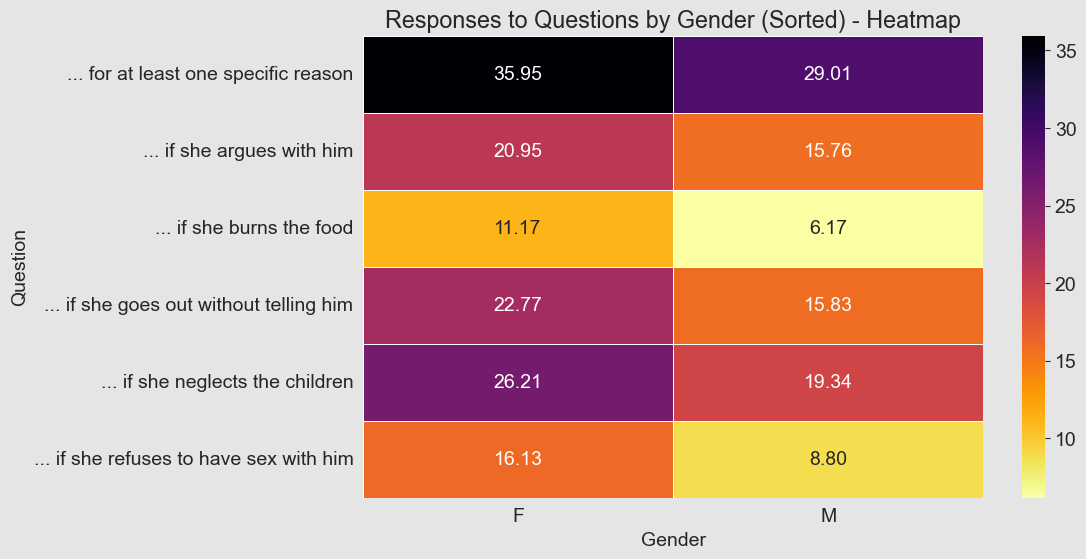

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data_rea' is your DataFrame
# Sort the DataFrame by 'Value' in descending order
data_rea_sorted = data_rea.sort_values(by='Value', ascending=False)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
heatmap_data = data_rea_sorted.pivot(index='Question', columns='Gender', values='Value')
sns.heatmap(heatmap_data, cmap = 'inferno_r', annot=True, fmt=".2f", linewidths=.5)

# Customize the plot
plt.title('Responses to Questions by Gender (Sorted) - Heatmap')
plt.xlabel('Gender')
plt.ylabel('Question')

# Show the plot
plt.show()

## By Year

In [84]:
year = drop.groupby(['Survey Year','Gender']).Value.mean()
data_year = year.reset_index()

In [85]:
drop['Survey Year'].value_counts()

Survey Year
2015    1776
2013    1776
2014    1428
2016    1374
2017    1023
2012     960
2011     660
2008     444
2018     360
2006     348
2010     180
2009     180
2005     162
2007     156
Name: count, dtype: int64

In [86]:
data_year

,Survey Year,Gender,Value
0,2005,F,10.559524
1,2005,M,11.493590
2,2006,F,21.460556
3,2006,M,22.864286
4,2007,F,1.585897
5,2007,M,5.798718
6,2008,F,11.654167
7,2008,M,13.542222
8,2009,F,7.981111
9,2009,M,9.910000


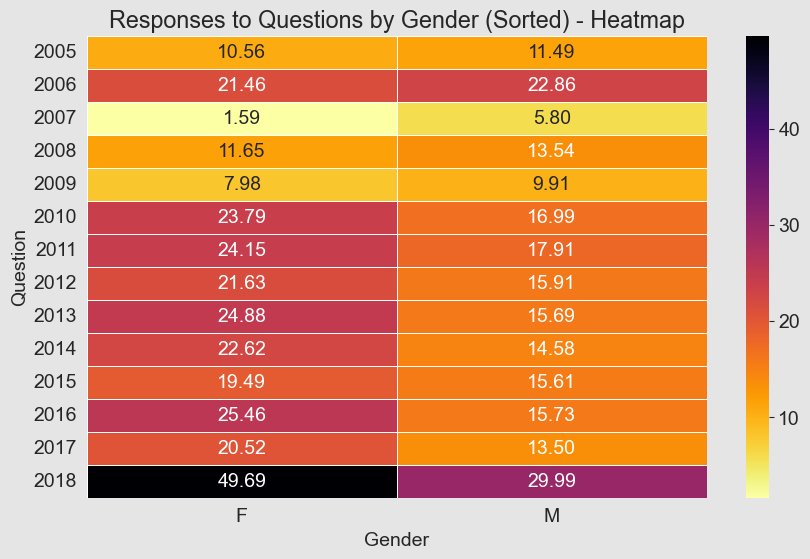

In [87]:
data_year_sorted = data_year.sort_values(by='Value', ascending=False)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
heatmap_data = data_year_sorted.pivot(index='Survey Year', columns='Gender', values='Value')
sns.heatmap(heatmap_data, cmap = 'inferno_r', annot=True, fmt=".2f", linewidths=.5)

# Customize the plot
plt.title('Responses to Questions by Gender (Sorted) - Heatmap')
plt.xlabel('Gender')
plt.ylabel('Question')

# Show the plot
plt.show()

### exam 2.3.2024

• Have you noticed anything unusual in the distribution across the age group category? Can we make any observations about their, for instance, marital status or employment? <br>
• Use a violin plot and explain why extreme values were excluded. Where do these extreme values come from — is there a particular country, level of education, or employment status that stands out? <br>
• Investigate a correlation between education and place of residence, and use hue for the `value` parameter.

Main thing that we can say based on the anayisis is that education is the biggest factor when it comes to violance exceptance. Other thing that remains constant during the dataset, is that women are more excepting of violence than men, which seem to approve it less with age.

As for the outliers, we can see that countries with the highest level of acceptance have the largest amount of outliers, so we will not look at them as such. They are just high values in comparison to the rest of the dataset.

We can see that coutries that have the largest number of outlier, are the ones who have the biggest acceptance overall, so we will not exclude them.<br>

Timor-Leste                  43<br>
Afghanistan                  38<br>
Mali                         34<br>
Chad                         23<br>
Congo Democratic Republic    20<br>
Guinea                       12<br>

Also, in the outliers file, we have 201 records from women, and 30 from men, which also follows the trend of the file, that women are much more accepting of violance againts them.

In [109]:
#I added the Alpha 3 codes to the dataset to vizualize the acceptace accorss the countries on the plotly geo map

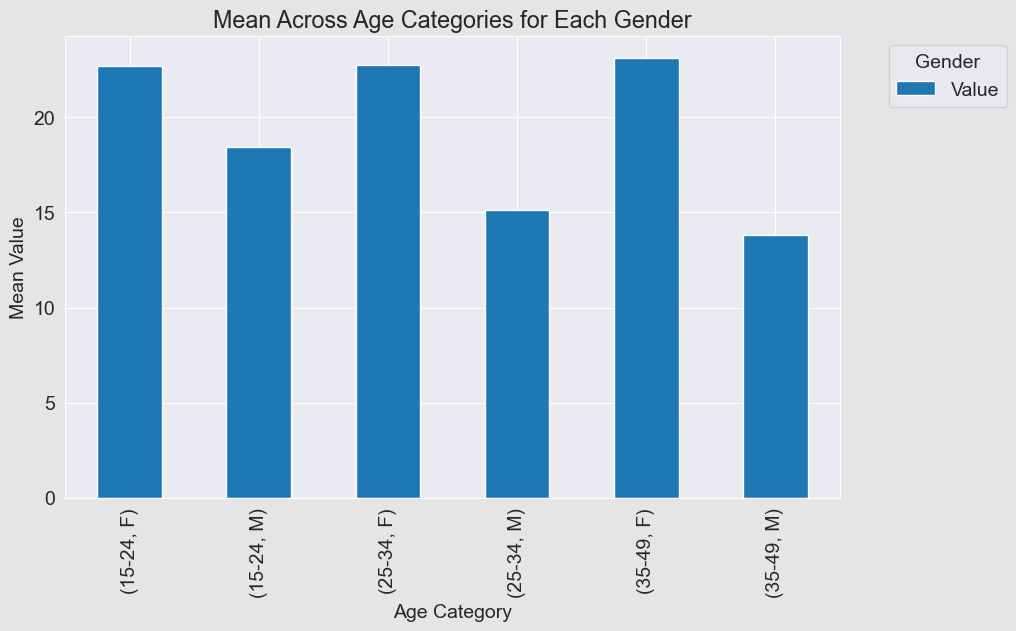

In [104]:
# Plotting
age1.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Across Age Categories for Each Gender')
plt.xlabel('Age Category')
plt.ylabel('Mean Value')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [105]:
#women agree with violence torought their life, while men appove of it less with age.

In [111]:
#Violin plot

We can see that distribution for each set of answers seems to be the same, with same extreme values, so it does not make sense to exclude them

In [123]:
#Violin plot to show outlier distribution

<Axes: xlabel='Value'>

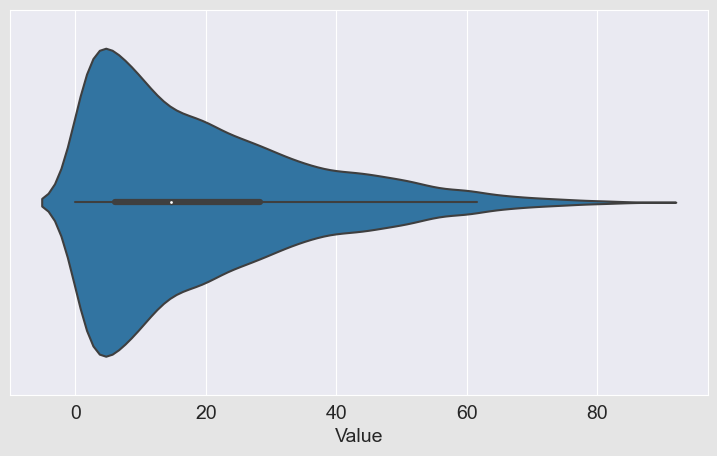

In [122]:
sns.violinplot(x = values_column)

In [134]:
record = drop.groupby(['RecordID', 'Demographics Response']).Value.mean()
data_rec = record.reset_index()

In [137]:
data_rec = data_rec[data_rec['RecordID'] == 1]s

In [138]:
data_rec

,RecordID,Demographics Response,Value
0,1,15-24,13.35
1,1,25-34,13.20
2,1,35-49,13.70
3,1,Employed for cash,14.60
4,1,Employed for kind,13.85
5,1,Higher,7.30
6,1,Married or living together,13.40
7,1,No education,14.85
8,1,Primary,10.05
9,1,Rural,13.90


Due to the structure of the data it is very difficult to draw concluions on the correlation between different demographics groups as they lack the correlation information between them.

To see the correlation we would need one row of data to represent one person, and then columns to represent different features about them. Since all features are in one column, we can't draw conclusions on how they are correlated, we can only filter and group them to draw conclusions on individual demographics responses, but it is difficult to see how they are correlated.

For example, we can see that for one entry, that person in unemployes, but we don't know how old that person is, what their marital status is, etc.

In [151]:
comp = age.groupby(['Question','Demographics Response']).Value.mean()
data_comp = comp.reset_index()

In [152]:
data_food = data_comp[data_comp['Question'] == '... if she burns the food']

In [153]:
data_food

,Question,Demographics Response,Value
6,... if she burns the food,15-24,9.804167
7,... if she burns the food,25-34,8.530833
8,... if she burns the food,35-49,8.450000


In [156]:
data_out = data_comp[data_comp['Question'] == '... if she goes out without telling him']

In [157]:
data_out

,Question,Demographics Response,Value
9,... if she goes out without telling him,15-24,20.581452
10,... if she goes out without telling him,25-34,19.809677
11,... if she goes out without telling him,35-49,19.530645


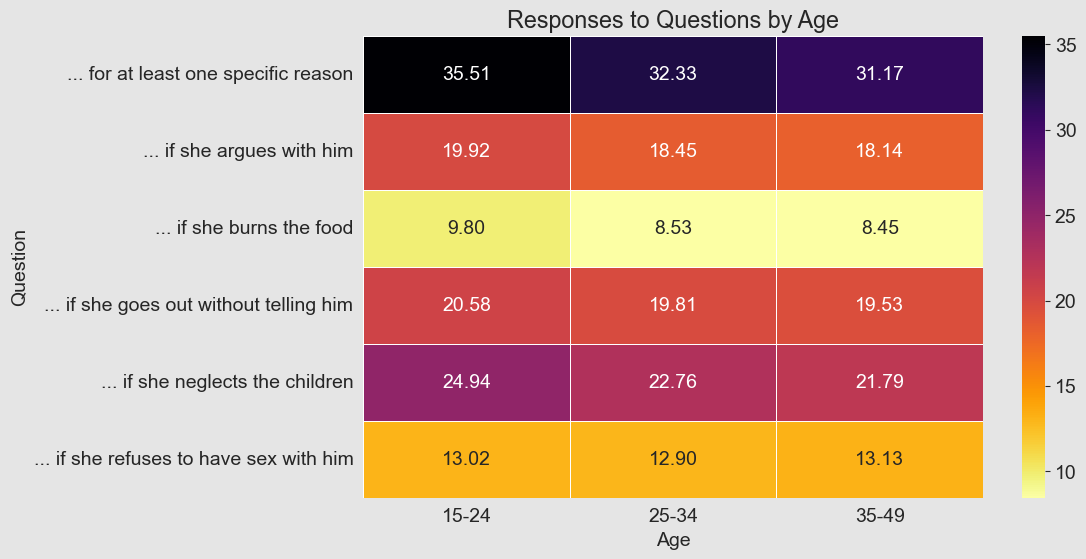

In [159]:
data_year_sorted = data_comp.sort_values(by='Value', ascending=False)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
heatmap_data = data_year_sorted.pivot(index='Question', columns='Demographics Response', values='Value')
sns.heatmap(heatmap_data, cmap = 'inferno_r', annot=True, fmt=".2f", linewidths=.5)

# Customize the plot
plt.title('Responses to Questions by Age')
plt.xlabel('Age')
plt.ylabel('Question')

# Show the plot
plt.show()

Here we can see that younger people are more accepting then older people, in both sexes. With age, the values get lower. <br>
Also, we see that people agree with violence on more that one reason, and that a specific reason can not be drawn out,  but that if a woman for any reason does not agree with the man, the violence is justified.

<Axes: xlabel='Value', ylabel='Count'>

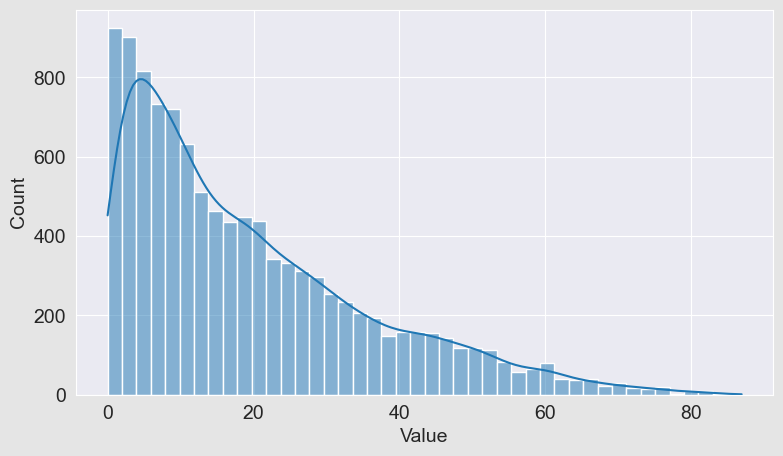

In [162]:
sns.histplot(data = drop, x = 'Value', kde = True)

Since the values column is the only continious variable, we can plot a histogram of the distribution and use kernals to devide the distribution into smaller section to further analyze them.
We could use smaller bars for the denser areas, and larger(wider) ones for the smaller values.
Then we could take one bar with the smallest values and analyze it and see which categories pop up the most. Who are the people who agree the least with violence?